导入库

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori  # 生成频繁项集
from mlxtend.frequent_patterns import association_rules  # 生成强关联规则

定义数据预处理函数，attr_dict存储所有网页种类，user_case存储所有样本

In [23]:
path = ['anonymous-msweb.data','anonymous-msweb.test']
attr_dict = {}
user_case = []
def Getdata(path):
    c = []
    with open(path, 'r+') as path:
        for line in path:
            token = line.split(',')
            if token[0] == 'A':
                attr_dict[token[1]] = ''.join((token[3][1:-1],token[4][1:-2]))
            elif token[0] == 'C':
                user_case.append(c)
                c = []
            elif token[0] == 'V':
                c.append(attr_dict[token[1]])
    del user_case[0]
    return user_case

获取处理后数据

In [24]:
dataSet = Getdata(path[0])
print(dataSet[0])
print(dataSet[10])

['regwiz/regwiz', 'Support Desktop/support', 'End User Produced View/athome']
['Excel/msexcel', 'MS Excel/excel', 'Products /products', 'isapi/isapi', 'MS PowerPoint/mspowerpoint']


{'International AutoRoute/autoroute': 0, 'library/library': 0, 'Master Chef Product Information/masterchef': 0, 'Central America/centroam': 0, 'For Developers Only Info/developer': 45, 'Multimedia Golf/msgolf': 1, 'Microsoft Consulting/msconsult': 3, 'home/home': 2, 'Reference Support/referencesupport': 11, 'Microsoft Magazine/magazine': 63, 'MS Access Support/msaccesssupport': 105, 'Visual Fox Pro Support/vfoxprosupport': 20, 'Visual Test Support/vtestsupport': 3, 'Benelux Region/benelux': 18, 'controls/controls': 1, 'Sidewalk/sidewalk': 52, 'Visual FoxPro/vfoxpro': 97, 'Microsoft.com Search/search': 8463, 'MS PowerPoint News/powerpoint': 195, 'Netherlands (Holland)/netherlands': 118, 'Picture It/pictureit': 18, 'Microsoft Financial Forum/msft': 86, 'Norway/norge': 42, 'Internet Site Construction for Developers/sitebuilder': 3220, 'Corporation Information/corpinfo': 365, 'Virtual Reality Markup Language/vrml': 30, 'MS Publisher Support/publishersupport': 18, 'Hardware Supprt/hardwares

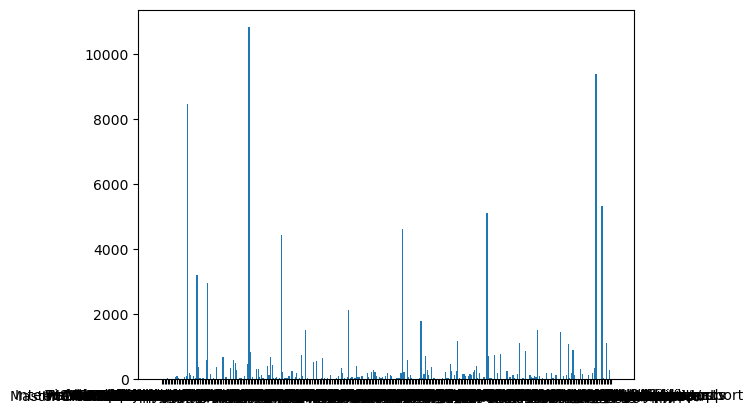

In [30]:
import matplotlib.pylab as plt
count = {}
for key, value in attr_dict.items():
    count[value] = 0
for i in dataSet:
    for j in i:
        count[j] += 1
print(count)
plt.bar(list(count.keys()),list(count.values()))
plt.show()

大部分网页的访问量很低，甚至没有被访问到，总体在数据上呈现出的分布是少量网页被大量访问。

In [37]:
sort_c = sorted(count.items(), key=lambda x:x[1],reverse=True)
print(sort_c[0:10])

[('Free Downloads/msdownload', 10835), ('Internet Explorer/ie', 9383), ('Microsoft.com Search/search', 8463), ('isapi/isapi', 5330), ('Products /products', 5108), ('Windows Family of OSs/windows', 4628), ('Support Desktop/support', 4451), ('Internet Site Construction for Developers/sitebuilder', 3220), ('Knowledge Base/kb', 2968), ("Web Site Builder's Gallery/gallery", 2123)]


可以看到，‘Free Downloads/msdownload’被用户浏览的次数最高，为10835，第十位是‘Web Site Builder's Gallery/gallery’，浏览次数为2123。

转换原数据到0-1矩阵

In [25]:
column_list = []
for var in dataSet:
    column_list = set(column_list) | set(var)
data = pd.DataFrame(np.zeros((len(dataSet), 285)), columns=column_list)
for i in range(len(dataSet)):
    for j in dataSet[i]:
        data.loc[i, j] += 1

用apriori算法计算数据

In [26]:
frequent_itemsets = apriori(data, min_support=0.02, use_colnames=True)
print(pd.DataFrame(frequent_itemsets))
pd.DataFrame(frequent_itemsets).to_csv('frequent_itemsets.csv')

d:\IDE\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                           itemsets
0   0.044207                                      (Games/games)
1   0.023204       (Corporate Desktop Evaluation/organizations)
2   0.027881                                    (regwiz/regwiz)
3   0.020483                                  (Jakarta/visualj)
4   0.021339                              (Visual Basic/vbasic)
..       ...                                                ...
74  0.023938  (Free Downloads/msdownload, Internet Explorer/...
75  0.031733  (Free Downloads/msdownload, Internet Explorer/...
76  0.022806  (Knowledge Base/kb, Microsoft.com Search/searc...
77  0.025191  (Free Downloads/msdownload, Microsoft.com Sear...
78  0.020361  (Free Downloads/msdownload, Windows95 Support/...

[79 rows x 2 columns]


生成关联规则

In [27]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.35)
print(pd.DataFrame(rules))

                                          antecedents  \
0   (Internet Site Construction for Developers/sit...   
1                (Web Site Builder's Gallery/gallery)   
2                                       (isapi/isapi)   
3                           (Support Desktop/support)   
4                                       (isapi/isapi)   
..                                                ...   
65  (Free Downloads/msdownload, Windows95 Support/...   
66    (Windows95 Support/windowssupport, isapi/isapi)   
67  (Windows95 Support/windowssupport, Windows Fam...   
68       (isapi/isapi, Windows Family of OSs/windows)   
69                 (Windows95 Support/windowssupport)   

                                          consequents  antecedent support  \
0                (Web Site Builder's Gallery/gallery)            0.098441   
1   (Internet Site Construction for Developers/sit...            0.064904   
2                           (Support Desktop/support)            0.162947   
3      

根据计算得到的置信度等信息，网站可以以上面两个网站之间的关联性构建导航结构，根据用户已经访问过的网站情况，从关联数据中提取找到可能会访问的下一个网站，为用户节省搜索时间。

In [28]:
pd.DataFrame(rules).to_csv('rules.csv')